<a href="https://colab.research.google.com/github/WendyTous/Curso-de-Probabilidad/blob/main/Modelos_Probabilisticos_R_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Todos Modelos Probabilisticos Discretos**
juliohurtado210307@gmail.com**

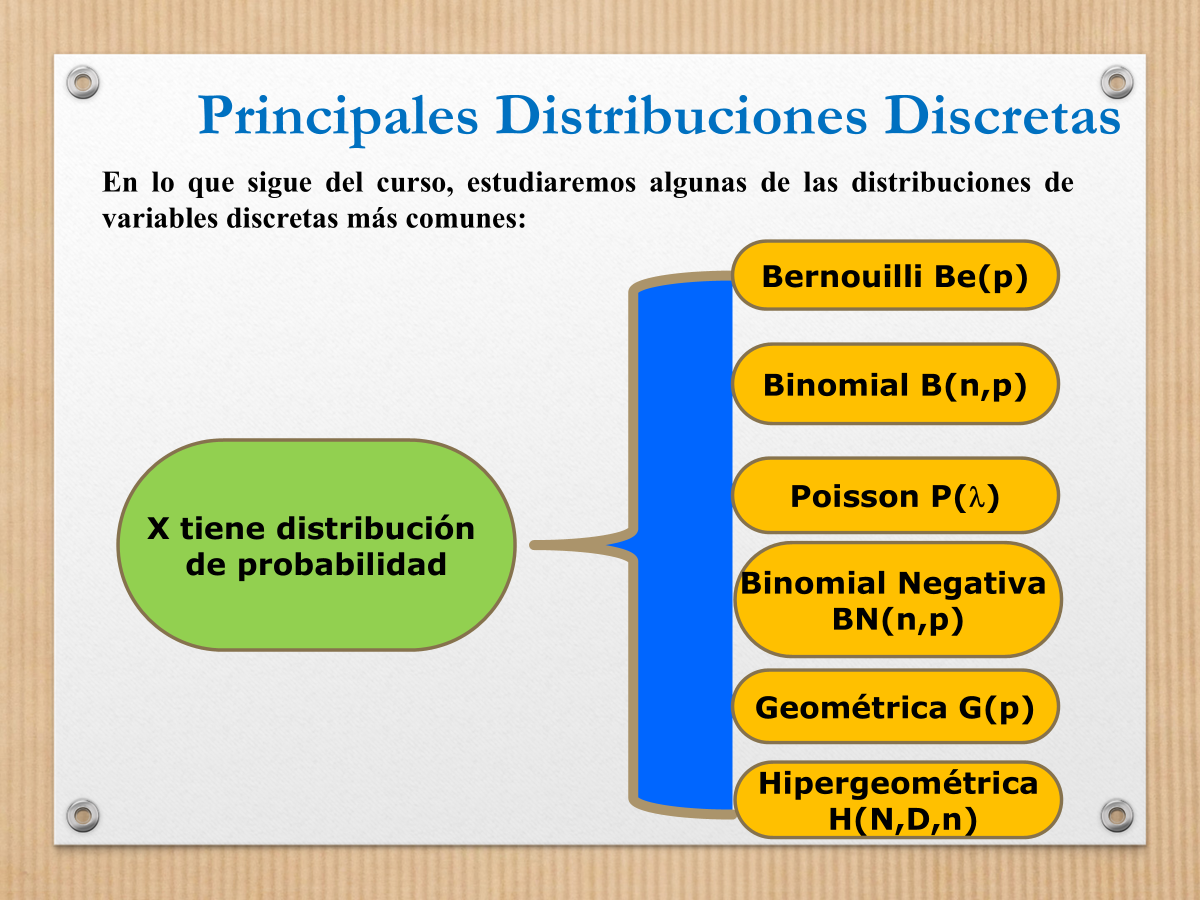

In [7]:
# @title **Paso 1. Instalar R y rpy2 - Usar R en Colab**
!apt-get install -y r-base
!pip install rpy2
# Importar rpy2 para ejecutar código en R
%load_ext rpy2.ipython

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.0-3.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, nbinom, poisson, hypergeom, randint

# @title **Paso 2. Instrucciones Para Graficar cualquier distribucion discreta**
def plot_distribution(dist, values, pmf, title):
    plt.bar(values, pmf)
    plt.title(title)
    plt.xlabel('Valores')
    plt.ylabel('Probabilidad')
    plt.show()


In [9]:
%%R

# @title **Paso 3. Instrucciones para Graficar cualquier distribucion discreta en R**
plot_distribution <- function(values, pmf, title) {
  plot(values, pmf, type = "h", main = title, xlab = "Valores", ylab = "Probabilidad", lwd = 3)
}

# **Tema principal: Modelos Probabiliticos Discretos**
+ _Los modelos probabilísticos discretos se utilizan para describir experimentos aleatorios donde los resultados posibles son un conjunto finito o infinito numerable de valores. Aquí tienes una breve descripción de algunos modelos discretos y ejemplos asociados a cada uno:_



# **1. Distribución de Bernoulli**
## **a. Definición, Probabilidad y Momentos**
+ Una variable aleatoria $X$ tiene distribución de probabilidad de Bernoulli si únicamente puede tomar dos valores  {0, 1} = {“fracaso”,  “éxito”}, y se define:
  + $P\{X=1\}=p$
  + $P\{X=0\}=1-p$
+La distribución binomial modela el número de éxitos en una secuencia de $n$ ensayos independientes de Bernoulli, donde cada ensayo tiene dos posibles resultados: éxito o fracaso, y la probabilidad de éxito es $p$.

- **Función de probabilidad**: $$P(X = k) = p^k (1 - p)^{1 - k}, k=0,1$$

- **Parámetros**:$p$ es la probabilidad de éxito en el ensayo.


### **Distribución Bernoulli - Momentos**
- **Valor esperado (Esperanza)**: $$E(X) = p$$
- **Varianza**: $$\text{Var}(X) =p(1 - p)$$
- **Desviación estándar**: $$\sigma(X) = \sqrt{p \cdot (1 - p)}$$



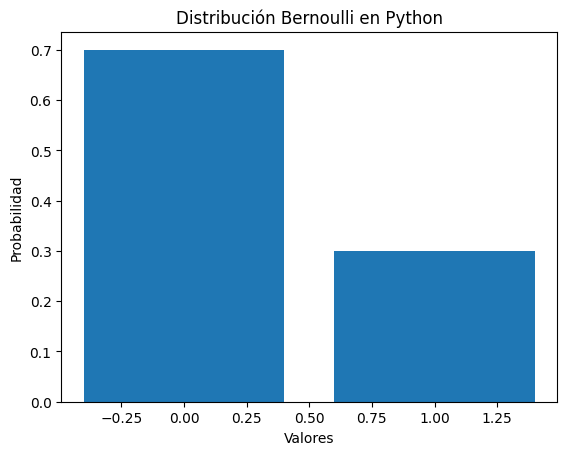

In [10]:
# @title **b. Gráfica de la Distribución de Bernoulli con Función de probabilidad en Python:**: $$P(X = k) = p^k (1 - p)^{1 - k}, k = 0, 1$$
n, p = 1, 0.3
x_binom = np.arange(0, n + 1)
pmf_binom = binom.pmf(x_binom, n, p)
plot_distribution(binom, x_binom, pmf_binom, "Distribución Bernoulli en Python")

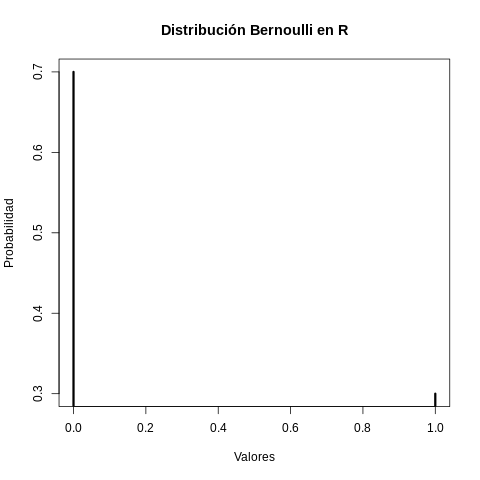

In [11]:
%%R

# @title **b. Gráfica de la Distribución de Bernoulli con Función de probabilidad en R**: $$P(X = k) = p^k (1 - p)^{1 - k}, k = 0, 1$$
n <- 1
p <- 0.3
x_bern <- 0:n
pmf_bern <- dbinom(x_bern, size = n, prob = p)
plot_distribution(x_bern, pmf_bern, "Distribución Bernoulli en R")


# **2. Distribución Binomial**
## **a. Definición y Momentos**
+ La distribución binomial modela el número de éxitos en una secuencia de $n$ ensayos independientes de Bernoulli, donde cada ensayo tiene dos posibles resultados: éxito o fracaso, y la probabilidad de éxito es $p$.

- **Función de probabilidad**: $$P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}$$
$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$
- **Parámetros**:$n$ es el número de ensayos y $p$ es la probabilidad de éxito en cada ensayo.


### **Distribución Binomial - Momentos**
- **Valor esperado (Esperanza)**: $$E(X) = n \cdot p$$
- **Varianza**: $$\text{Var}(X) = n \cdot p \cdot (1 - p)$$
- **Desviación estándar**: $$\sigma(X) = \sqrt{n \cdot p \cdot (1 - p)}$$



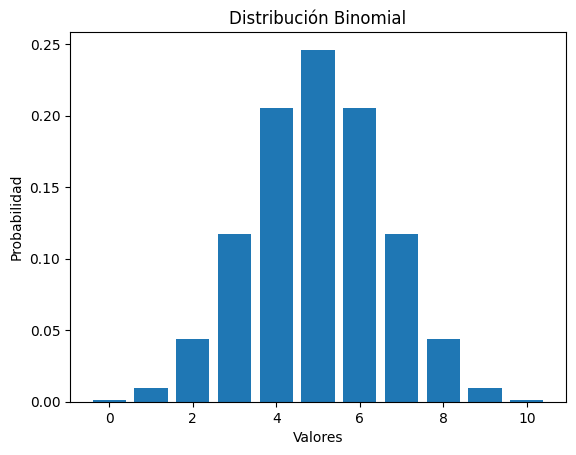

In [12]:
# @title **b. Gráfica de la Distribución Binomial con Función de probabilidad**: $$P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}$$
# Problema: X es igual al número de niñas en 10 nacimientos**
n, p = 10, 0.5
x_binom = np.arange(0, n + 1)
pmf_binom = binom.pmf(x_binom, n, p)
plot_distribution(binom, x_binom, pmf_binom, "Distribución Binomial")



#### **c. Ejemplo 1: - Distribución Binomial**
+ *Supongamos que lanzamos una moneda justa (probabilidad de éxito $p = 0.5$, $n =10$ veces. ¿Cuál es la probabilidad de obtener exactamente 6 caras?*

In [13]:
# @title **Solución ejemplo 1. Binomial -Función de probabilidad**: $$P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}$$
from scipy.stats import binom

# Parámetros
n = 10  # Número de ensayos
p = 0.5  # Probabilidad de éxito
k = 6  # Número de éxitos

# Probabilidad de obtener exactamente 6 caras
prob_binom_1 = binom.pmf(k, n, p)
print(f"Probabilidad de obtener exactamente 6 caras: P(X = 6) = {prob_binom_1:.4f}")


Probabilidad de obtener exactamente 6 caras: P(X = 6) = 0.2051


In [14]:
# @title **Momentos Modelo Binomial**
n = 10
p = 0.5
esperanza_binom = n * p
varianza_binom = n * p * (1 - p)
desviacion_binom = np.sqrt(varianza_binom)
print(f"Momentos en el Modelo Binomial")
print(f"Esperanza:E(X) = {n}{p}= {esperanza_binom}")
print(f"Varianza: V(X) = {n} * {p} * {(1 - p)} = {varianza_binom}")
print(f"Desviación estándar: {desviacion_binom}")


Momentos en el Modelo Binomial
Esperanza:E(X) = 100.5= 5.0
Varianza: V(X) = 10 * 0.5 * 0.5 = 2.5
Desviación estándar: 1.5811388300841898


In [15]:
# @title **Ejemplo 2:  La probabilidad de que una pieza fabricada por una empresa sea defectuosa es 0.1. Halla la probabilidad de que en una muestra de 25 piezas se encuentren a lo sumo cuatro piezas defectuosas**

# Parámetros
n = 25  # Número de ensayos
p = 0.1  # Probabilidad de éxito
k = 4  # Número de éxitos

# Probabilidad de obtener a lo sumo cuatro piezas defectuosas
prob_binom_2 = binom.cdf(k, n, p)
print(f"Probabilidad de obtener a lo sumo cuatro piezas defectuosas: P(X≤4 ) = {prob_binom_2:.5f}")

Probabilidad de obtener a lo sumo cuatro piezas defectuosas: P(X≤4 ) = 0.90201


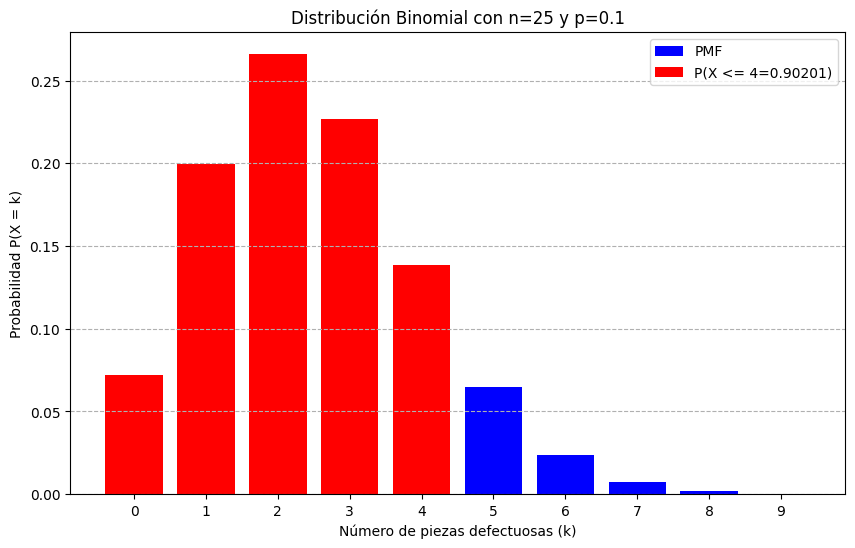

In [16]:
# prompt: Grafica la situacion planteada y sombrea la probabilidad con un color rojo

# Parámetros
n = 25  # Número de ensayos
p = 0.1  # Probabilidad de éxito
k_max = 4  # Número máximo de éxitos

# Valores posibles de la variable aleatoria
x_binom = np.arange(0, n -15)

# Calcular la función de masa de probabilidad (PMF)
pmf_binom = binom.pmf(x_binom, n, p)

# Graficar la distribución de probabilidad
plt.figure(figsize=(10, 6))
plt.bar(x_binom, pmf_binom, color='blue', label='PMF')

# Sombrear la probabilidad P(X <= 4)
plt.bar(x_binom[x_binom <= k_max], pmf_binom[x_binom <= k_max], color='red', label=f'P(X <= {k}={prob_binom_2:.5f})')

plt.title(f'Distribución Binomial con n={n} y p={p}')
plt.xlabel('Número de piezas defectuosas (k)')
plt.ylabel('Probabilidad P(X = k)')
plt.xticks(x_binom)
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

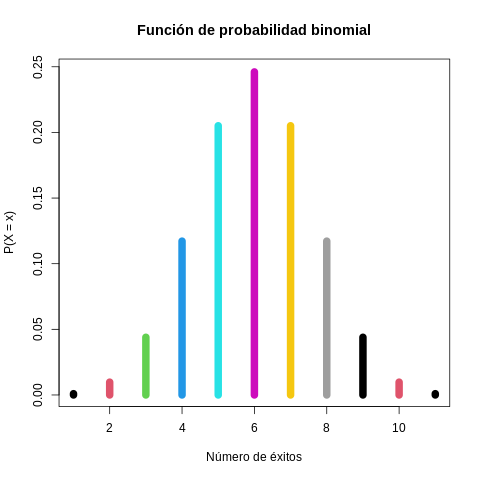

In [17]:
%%R
# Rejilla de valores del eje X
x <- 0:10

# n = 10, p = 0.5
plot(dbinom(x, size = 10, prob = 0.5), type = "h", lwd = 10,
     main = "Función de probabilidad binomial",
     ylab = "P(X = x)", xlab = "Número de éxitos", col = 1:10)

In [18]:
# @title **Ejemplo 3. El 60% de los Psicólogo de una facultad encuentran trabajo el primer año después de acabar la carrera. De los 100 Psicólogos en un curso, ¿Cuántos se espera que se coloque en el primer año? ¿Cuál es la varianza típica?**

# Parámetros
n = 100  # Número de ensayos
p = 0.6  # Probabilidad de éxito

# Número esperado de psicólogos en el primer año
esperanza_binom = n * p
print(f"Número esperado de psicólogos en el primer año: E(X) = {esperanza_binom}")

# Varianza de psicólogos en el primer año
varianza_binom = n * p * (1 - p)
print(f"Varianza de psicólogos en el primer año: V(X) = {varianza_binom}")

Número esperado de psicólogos en el primer año: E(X) = 60.0
Varianza de psicólogos en el primer año: V(X) = 24.0


In [19]:
# @title **Ejemplo 4. Suponiendo que el 40% de los Comunicadores Sociales tengan Rh-, si tomamos una muestra de siete Comunicadores Sociales, (a)  ¿Qué probabilidad hay de que todas sean Rh-?  (b) ¿Y de que máximo cuatro sean Rh+ ?**

# Parámetros
n = 7  # Número de ensayos
p = 0.4  # Probabilidad de éxito

# (a) Probabilidad de que todas sean Rh-
k1 = 7
prob_binom_3a = binom.pmf(k1, n, p)
print(f"(a) Probabilidad de que todas sean Rh-: P(X = {k1}) = {prob_binom_3a:.5f}")

# (b) Probabilidad de que máximo cuatro sean Rh+
k2 = 4
prob_binom_3b = binom.cdf(k2, n, p)
print(f"(b) Probabilidad de que máximo cuatro sean Rh+: P(X ≤ {k2}) = {prob_binom_3b:.5f}")


(a) Probabilidad de que todas sean Rh-: P(X = 7) = 0.00164
(b) Probabilidad de que máximo cuatro sean Rh+: P(X ≤ 4) = 0.90374


In [20]:
# @title **Ejemplo 5. Un laboratorio ha comprobado que el 25% de los que toman un determinado antibiótico sufren efectos secundarios. De una muestra de ocho enfermos que toman dicho antibiótico, halla la probabilidad de que sufran efectos secundarios al menos tres.**

# Parámetros
n = 8  # Número de ensayos
p = 0.25  # Probabilidad de éxito

# Probabilidad de que sufran efectos secundarios al menos tres
k1 = 3
prob_binom_3a = binom.cdf(k1-1, n, p)
print(f"Probabilidad de que sufran efectos secundarios al menos tres: P(X ≥ {k1}) = {1-prob_binom_3a:.5f}")


Probabilidad de que sufran efectos secundarios al menos tres: P(X ≥ 3) = 0.32146


In [21]:
# @title **Ejemplo 6. Un laboratorio ha comprobado que el 25% de los que toman un determinado antibiótico sufren efectos secundarios. De una muestra de ocho enfermos que toman dicho antibiótico, halla la probabilidad de que sufran efectos secundarios menos de 3**

# Parámetros
n = 8  # Número de ensayos
p = 0.25  # Probabilidad de éxito

# Probabilidad de que sufran efectos secundarios menos de 3
k1 = 3
prob_binom_3a = binom.cdf(k1-1, n, p)
print(f"Probabilidad de que sufran efectos secundarios menos de 3: P(X < {k1}) = {prob_binom_3a:.5f}")



Probabilidad de que sufran efectos secundarios menos de 3: P(X < 3) = 0.67854



#### **Ejercicio 1: Distribución Binomial - Debes realizarlo en este Laboratorio**
+ *En un control de calidad, se seleccionan $n=8$ piezas de un lote. La probabilidad de que una pieza esté defectuosa es $p=0.2$. ¿Cuál es la probabilidad de encontrar máximo 3 piezas defectuosas?*



### 2. **Distribución Binomial Negativa**
+ *La distribución binomial negativa modela el número de ensayos requeridos para obtener un número fijo de éxitos $r$ en ensayos independientes de Bernoulli, donde la probabilidad de éxito es $p$.*

- **Función de probabilidad**: $$P(X = k) = \binom{k + r - 1}{r - 1} p^r (1 - p)^k$$
- **Parámetros**:$r$ es el número de éxitos deseados, $p$ es la probabilidad de éxito y $k$ es el número de fracasos antes de obtener $r$ éxitos.

### **Distribución Binomial Negativa - Momentos**
- **Valor esperado (Esperanza)**: $$E(X) = \frac{r(1 - p)}{p}$$
- **Varianza**: $$\text{Var}(X) = \frac{r(1 - p)}{p^2}$$
- **Desviación estándar**: $$\sigma(X) = \sqrt{\frac{r(1 - p)}{p^2}}$$



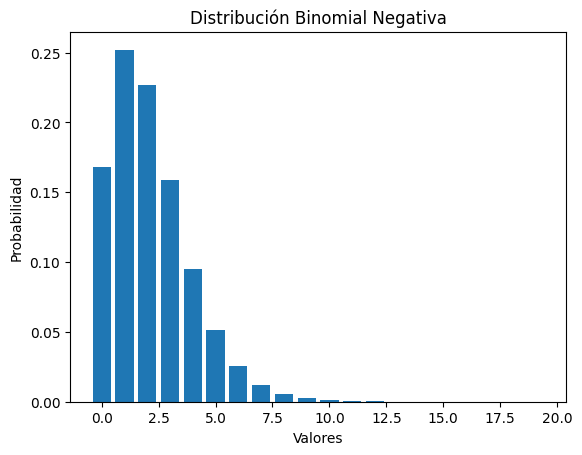

In [22]:
# @title **Gráfica de la Distribución Binomial Negativa** $$P(X = k) = \binom{k + r - 1}{r - 1} p^r (1 - p)^k$$
r, p = 5, 0.7
x_nbinom = np.arange(0, 20)
pmf_nbinom = nbinom.pmf(x_nbinom, r, p)
plot_distribution(nbinom, x_nbinom, pmf_nbinom, "Distribución Binomial Negativa")



#### **Ejemplo 1:- Distribución Binomial Negativa**
+ *¿Cuál es la probabilidad de obtener 5 éxitos antes de 3 fracasos si la probabilidad de éxito es $p = 0.7$?*


In [23]:
# @title **2. Solución Ejemplo 1 -Distribución Binomial negativa** $$P(X = k) = \binom{k + r - 1}{r - 1} p^r (1 - p)^k$$

from scipy.stats import nbinom

# Parámetros
r = 5  # Número de éxitos
p = 0.7  # Probabilidad de éxito
k = 3  # Número de fracasos antes de obtener 5 éxitos

# Probabilidad
prob_nbinom_1 = nbinom.pmf(k, r, p)
print(f"Probabilidad de obtener 5 éxitos antes de 3 fracasos: P(X=5) = {prob_nbinom_1:.4f}")


Probabilidad de obtener 5 éxitos antes de 3 fracasos: P(X=5) = 0.1588


In [24]:
# @title **Momentos Modelo Binomial Negativo**
r = 5
p = 0.7
esperanza_nbinom = r * (1 - p) / p
varianza_nbinom = r * (1 - p) / (p ** 2)
desviacion_nbinom = np.sqrt(varianza_nbinom)
print(f"Momentos en el Modelo Binomial Negativo")
print(f"Esperanza:E(X) =  {esperanza_nbinom}")
print(f"Varianza: V(X) =  {varianza_nbinom}")
print(f"Desviación estándar: {desviacion_nbinom}")

Momentos en el Modelo Binomial Negativo
Esperanza:E(X) =  2.1428571428571432
Varianza: V(X) =  3.061224489795919
Desviación estándar: 1.7496355305594131


In [25]:
# @title **BN -- La probabilidad de un niño expuesto al COVID-19 se contagie es de 0.6. ¿Cuál es la probabilidad de que el 10° niño expuesto sea el tercero en contraerla?**

# Parámetros
n = 10  # Número de ensayos
r = 3  # Número de exitos
p = 0.6  # Probabilidad de éxito
k = n-3  # Número de fracasos antes de obtener 5 éxitos

# Probabilidad
prob_nbinom_1 = nbinom.pmf(k, r, p)
print(f"Probabilidad de obtener 5 éxitos antes de 3 fracasos: P(X=5) = {prob_nbinom_1:.5f}")


Probabilidad de obtener 5 éxitos antes de 3 fracasos: P(X=5) = 0.01274



#### **Ejemplo 2. -Distribución Binomial Negativa: Debes realizarlo en este Laboratorio**
+ *Si lanzamos un dado con probabilidad de éxito $p = 1/6$, ¿cuál es la probabilidad de obtener 2 éxitos antes de obtener 4 fracasos?*



### 3. **Distribución de Poisson**
+ *La distribución de Poisson modela el número de eventos que ocurren en un intervalo de tiempo o espacio, bajo la suposición de que los eventos ocurren con una tasa constante y de forma independiente entre sí.*

- **Función de probabilidad**: $$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$
- **Parámetros**: $\lambda$ es la tasa promedio de ocurrencia de eventos en el intervalo de tiempo o espacio.


### **Distribución de Poisson - Momentos**
- **Valor esperado (Esperanza)**: $$E(X) = \lambda$$
- **Varianza**: $$\text{Var}(X) = \lambda$$
- **Desviación estándar**: $$\sigma(X) = \sqrt{\lambda}$$




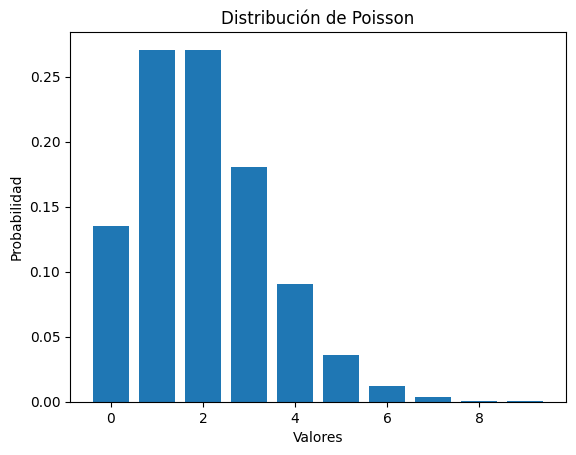

In [26]:
# @title **Gráfica de la Distribución de Poisson** $$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$
lambda_poisson = 2
x_poisson = np.arange(0, 10)
pmf_poisson = poisson.pmf(x_poisson, lambda_poisson)
plot_distribution(poisson, x_poisson, pmf_poisson, "Distribución de Poisson")



#### **Ejemplo 1: Distribución de Poisson**
+ *Una central telefónica recibe en promedio 2 llamadas por minuto. ¿Cuál es la probabilidad de que en un minuto se reciban exactamente 3 llamadas?*


In [27]:
# @title  **Solución Ejemplo 1: Distribución de Poisson** $$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$
from scipy.stats import poisson

# Parámetros
lambda_poisson = 2  # Tasa promedio de ocurrencia
k = 3  # Número de eventos (llamadas)

# Probabilidad
prob_poisson_1 = poisson.pmf(k, lambda_poisson)
print(f"Probabilidad de recibir exactamente 3 llamadas:P(X=3) = {prob_poisson_1:.4f}")


Probabilidad de recibir exactamente 3 llamadas:P(X=3) = 0.1804


In [28]:
# @title  **Momentos en el modelo de Poisson**
lambda_poisson = 2
esperanza_poisson = lambda_poisson
varianza_poisson = lambda_poisson
desviacion_poisson = np.sqrt(varianza_poisson)

print(f"Momentos en el Modelo de Poisson")
print(f"Esperanza:E(X) =  {esperanza_poisson}")
print(f"Varianza: V(X) =  {varianza_poisson}")
print(f"Desviación estándar: {desviacion_poisson}")


Momentos en el Modelo de Poisson
Esperanza:E(X) =  2
Varianza: V(X) =  2
Desviación estándar: 1.4142135623730951


In [29]:
# @title **Ejemplo 2. Si un banco recibe en promedio 6 cheques sin fondo por día, ¿cuáles son las probabilidades de que reciba: a. cuatro cheques sin fondo en un día dado, b. cincuenta cheques sin fondo en una semana, c. diez cheques sin fondo en un 12 horas, d.  5 cheques sin fondos en 4 horas?**

# Parámetros
lambda_poisson1 = 6  # Tasa promedio de ocurrencia

# (a) Probabilidad de recibir exactamente 4 cheques sin fondo en un día dado

k1 = 4  # Número de eventos (llamadas)

# Probabilidad
prob_poisson_1 = poisson.pmf(k1, lambda_poisson1)
print(f"Probabilidad de recibir exactamente 4 cheques sin fondo en un dia:P(X=4) = {prob_poisson_1:.5f}")

# (b) Probabilidad de recibir exactamente 50 cheques sin fondo en una semana
# Parámetros
lambda_poisson2 = 6*7
k2 = 50  # Número de eventos (cheques sin fondo)

# Probabilidad
prob_poisson_2 = poisson.pmf(k2, lambda_poisson2)
print(f"Probabilidad de recibir exactamente 50 cheques sin fondo en una semana :P(X=50) = {prob_poisson_2:.5f}")

# (c) Diez cheques sin fondo en un 12 horas

# Parámetros
lambda_poisson3 = 6*0.5
k3 = 10  # Número de eventos (cheques sin fondo)

# Probabilidad
prob_poisson_3 = poisson.pmf(k3, lambda_poisson3)
print(f"Probabilidad de recibir exactamente 10 cheques sin fondo en un 12 horas:P(X=10) = {prob_poisson_3:.5f}")


Probabilidad de recibir exactamente 4 cheques sin fondo en un dia:P(X=4) = 0.13385
Probabilidad de recibir exactamente 50 cheques sin fondo en una semana :P(X=50) = 0.02748
Probabilidad de recibir exactamente 10 cheques sin fondo en un 12 horas:P(X=10) = 0.00081


In [30]:
# @title **Ejemplo 2. En la zona que rodea un punto kilométrico de una autovía hay una población de erizos. Se ha realizado un estudio por el que se ha deducido que los erizos cruzan la autovía a razón de 4 cada 30 minutos. La probabilidad de que 6 o más erizos crucen la autovía en una hora es:**

# Parámetros
lambda_poisson4 = 4*2  # Tasa promedio de ocurrencia
k4 = 6  # Número de eventos (erizos)

# Probabilidad
prob_poisson_4 = 1 - poisson.cdf(k4-1, lambda_poisson4)
print(f"Probabilidad de que 6 o más erizos crucen la autovía en una hora:P(X≥6) = {prob_poisson_4:.5f}")


Probabilidad de que 6 o más erizos crucen la autovía en una hora:P(X≥6) = 0.80876


In [31]:
# @title **Ejemplo 3. En una carretera se producen un promedio de 2 accidentes anuales. Calcula la probabilidad de que estos cinco años se produzcan más de 3 accidentes.**


# Parámetros
lambda_poisson5 = 2*5  # Tasa promedio de ocurrencia
k5 = 3  # Número de eventos (erizos)

# Probabilidad
prob_poisson_5 = 1 - poisson.cdf(k5, lambda_poisson5)
print(f"Probabilidad de que 6 o más erizos crucen la autovía en una hora:P(X≥6) = {prob_poisson_5:.5f}")




Probabilidad de que 6 o más erizos crucen la autovía en una hora:P(X≥6) = 0.98966


In [32]:
# @title **Ejemplo 4. En una carretera se producen un promedio de 2 accidentes anuales. Calcula la probabilidad de que estos cinco años se produzcan más de 3 accidentes.**

# Parámetros
lambda_poisson6 = 2*5  # Tasa promedio de ocurrencia
k6 = 3  # Número de eventos (accidente)

# Probabilidad
prob_poisson_6 = 1 - poisson.cdf(k6, lambda_poisson6)
print(f"Probabilidad de que se produzcan más de 3 accidentes:P(X>3) = {prob_poisson_6:.5f}")


Probabilidad de que se produzcan más de 3 accidentes:P(X>3) = 0.98966



#### **Ejemplo 2: Distribución de Poisson - Debes realizarlo en este Laboratorio**
+ *En una intersección, se observa que en promedio ocurren 5 accidentes al mes. ¿Cuál es la probabilidad de que en un mes ocurra 1 accidente?*


### 4. **Distribución Hipergeométrica**
+ *La distribución hipergeométrica modela el número de éxitos en una muestra de tamaño \(n\) tomada sin reemplazo de una población de tamaño \(N\), que contiene \(K\) éxitos y \(N - K\) fracasos.*

- **Función de probabilidad**: $$P(X = k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}}$$
- **Parámetros**: \(N\) es el tamaño de la población, \(K\) es el número de éxitos en la población, \(n\) es el tamaño de la muestra, y \(k\) es el número de éxitos en la muestra.

### **Distribución Hipergeométrica - Momentos**
- **Valor esperado (Esperanza)**: $$E(X) = n \cdot \frac{K}{N}$$
- **Varianza**: $$\text{Var}(X) = n \cdot \frac{K}{N} \cdot \frac{N - K}{N} \cdot \frac{N - n}{N - 1}$$
- **Desviación estándar**: $$\sigma(X) = \sqrt{\text{Var}(X)}$$




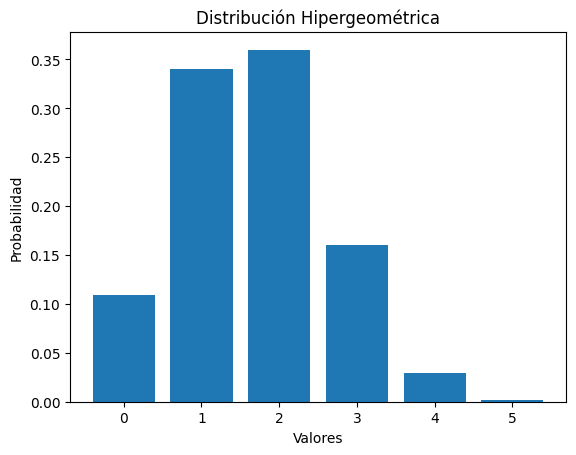

In [33]:

# @title **Gráfica de la Distribución Hipergeométrica** $$P(X = k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}}$$
N, K, n = 30, 10, 5
x_hyper = np.arange(0, n + 1)
pmf_hyper = hypergeom.pmf(x_hyper, N, K, n)
plot_distribution(hypergeom, x_hyper, pmf_hyper, "Distribución Hipergeométrica")



#### **Ejemplo 1:- Distribución Hipergeométrica**
+ *Una urna contiene 10 bolas rojas y 20 bolas azules. Se seleccionan 5 bolas sin reemplazo. ¿Cuál es la probabilidad de seleccionar exactamente 3 bolas rojas?*

In [56]:
# @title **En Python: Solución Ejemplo 1:- Distribución Hipergeométrica** $$P(X = k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}}$$
from scipy.stats import hypergeom

# Parámetros
N = 15  # Tamaño de la población (total de bolas)
K = 5  # Número de éxitos en la población (bolas rojas)
n = 4  # Tamaño de la muestra
k = 3  # Número de éxitos en la muestra (bolas rojas)

# Probabilidad
prob_hyper_1 = hypergeom.pmf(k, N, K, n)
print(f"Probabilidad de seleccionar exactamente 3 bolas rojas: P(X=3)={prob_hyper_1:.4f}")


Probabilidad de seleccionar exactamente 3 bolas rojas: P(X=3)=0.0733


In [35]:
# @title  **Momentos en el modelo Hipergeométrico**
N = 30  # Tamaño de la población
K = 10  # Éxitos en la población
n = 5   # Tamaño de la muestra

esperanza_hyper = n * (K / N)
varianza_hyper = n * (K / N) * ((N - K) / N) * ((N - n) / (N - 1))
desviacion_hyper = np.sqrt(varianza_hyper)

print(f"Momentos en el Modelo Hipergeométrico")
print(f"Esperanza:E(X) =  {esperanza_hyper}")
print(f"Varianza: V(X) =  {varianza_hyper}")
print(f"Desviación estándar: {desviacion_hyper}")

Momentos en el Modelo Hipergeométrico
Esperanza:E(X) =  1.6666666666666665
Varianza: V(X) =  0.957854406130268
Desviación estándar: 0.978700365857839



#### **Ejemplo 2: - Distribución Hipergeométrica- Debes realizarlo en este Laboratorio**
En una fábrica, de un lote de 50 productos, 8 son defectuosos. Si se seleccionan 10 productos al azar, ¿cuál es la probabilidad de que 2 productos sean defectuosos?



### 5. **Distribución Uniforme Discreta**
+ *La distribución uniforme discreta modela una situación donde todos los valores enteros posibles entre dos límites $a$ y $b$ tienen la misma probabilidad.*

- **Función de probabilidad**: $$P(X = x) = \frac{1}{b - a + 1}$$ para $x = a, a+1, \dots, b$
- **Parámetros**: $a$ es el límite inferior, $b$ es el límite superior.

### **Distribución Uniforme Discreta - Momentos**
- **Valor esperado (Esperanza)**: $$E(X) = \frac{a + b}{2}$$
- **Varianza**: $$\text{Var}(X) = \frac{(b - a + 1)^2 - 1}{12}$$
- **Desviación estándar**: $$\sigma(X) = \sqrt{\text{Var}(X)}$$


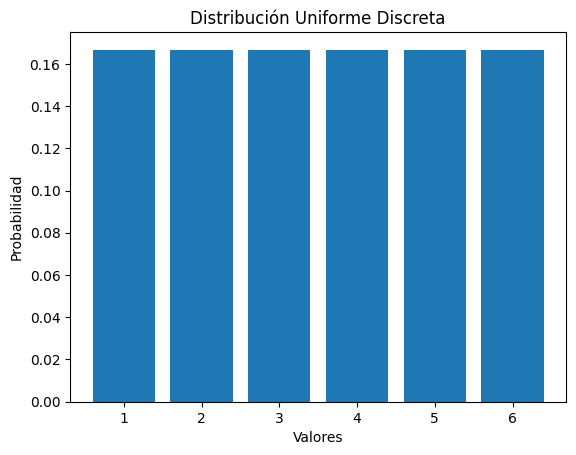

In [36]:
# @title **Grafica de la Uniforme Discreta** $$P(X = x) = \frac{1}{b - a + 1}$$ para $x = a, a+1, \dots, b$
a, b = 1, 6
x_uniform = np.arange(a, b + 1)
pmf_uniform = [1 / (b - a + 1)] * len(x_uniform)
plot_distribution(randint, x_uniform, pmf_uniform, "Distribución Uniforme Discreta")



#### **Ejemplo 1: - Distribución Uniforme Discreta**
+ *Si un dado se lanza, ¿cuál es la probabilidad de obtener un número mayor que 4?*


In [37]:
# @title **Solución ejemplo 1.** $$P(X = x) = \frac{1}{b - a + 1}$$ para $x = a, a+1, \dots, b$
from scipy.stats import randint

# Parámetros
a, b = 1, 6  # Límite inferior y superior del dado
k = 5  # Número mayor que 4

# Probabilidad
prob_uniform_1 = randint.pmf(k, a, b+1)
print(f"Probabilidad de obtener un número mayor que 4: P(X>4) = P(X=5)+P(X=6) = 2*{prob_uniform_1:.4f}= {2*prob_uniform_1:.4f}")


Probabilidad de obtener un número mayor que 4: P(X>4) = P(X=5)+P(X=6) = 2*0.1667= 0.3333


In [38]:
# @title  **Momentos en el modelo Uniforme discreto**
a, b = 1, 6  # Limites del dado

esperanza_uniform = (a + b) / 2
varianza_uniform = ((b - a + 1) ** 2 - 1) / 12
desviacion_uniform = np.sqrt(varianza_uniform)

print(f"Momentos en el Modelo Uniforme Discreto")
print(f"Esperanza:E(X) =  {esperanza_uniform}")
print(f"Varianza: V(X) =  {varianza_uniform}")

Momentos en el Modelo Uniforme Discreto
Esperanza:E(X) =  3.5
Varianza: V(X) =  2.9166666666666665



#### **Ejemplo 2:- Distribución Uniforme Discreta - Debes realizarlo en este Laboratorio**
+ *Se selecciona un número al azar entre 1 y 20. ¿Cuál es la probabilidad de obtener un número par?*



### Implementación en Python

Voy a construir las gráficas para cada una de estas distribuciones y los ejemplos correspondientes.

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, nbinom, poisson, hypergeom, randint

# Graficar distribuciones
def plot_distribution(dist, values, pmf, title):
    plt.bar(values, pmf)
    plt.title(title)
    plt.xlabel('Valores')
    plt.ylabel('Probabilidad')
    plt.show()

# 1. Binomial
n, p = 10, 0.5
x_binom = np.arange(0, n + 1)
pmf_binom = binom.pmf(x_binom, n, p)
plot_distribution(binom, x_binom, pmf_binom, "Distribución Binomial")

# 2. Binomial Negativa
r, p = 5, 0.7
x_nbinom = np.arange(0, 20)
pmf_nbinom = nbinom.pmf(x_nbinom, r, p)
plot_distribution(nbinom, x_nbinom, pmf_nbinom, "Distribución Binomial Negativa")

# 3. Poisson
lambda_poisson = 2
x_poisson = np.arange(0, 10)
pmf_poisson = poisson.pmf(x_poisson, lambda_poisson)
plot_distribution(poisson, x_poisson, pmf_poisson, "Distribución de Poisson")

# 4. Hipergeométrica
N, K, n = 30, 10, 5
x_hyper = np.arange(0, n + 1)
pmf_hyper = hypergeom.pmf(x_hyper, N, K, n)
plot_distribution(hypergeom, x_hyper, pmf_hyper, "Distribución Hipergeométrica")

# 5. Uniforme Discreta
a, b = 1, 6
x_uniform = np.arange(a, b + 1)
pmf_uniform = [1 / (b - a + 1)] * len(x_uniform)
plot_distribution(randint, x_uniform, pmf_uniform, "Distribución Uniforme Discreta")
```

### Ejemplos implementados en Python

Te implementaré los ejemplos para cada distribución en un archivo separado.

Déjame saber si necesitas algo más.

No hay problema, aquí tienes las fórmulas del valor esperado, varianza y desviación estándar para cada una de las distribuciones que mencionamos, junto con su implementación en Python.

```python
n = 10
p = 0.5
esperanza_binom = n * p
varianza_binom = n * p * (1 - p)
desviacion_binom = np.sqrt(varianza_binom)

print(f"Binomial - Esperanza: {esperanza_binom}, Varianza: {varianza_binom}, Desviación estándar: {desviacion_binom}")
```


```python
r = 5
p = 0.7
esperanza_nbinom = r * (1 - p) / p
varianza_nbinom = r * (1 - p) / (p ** 2)
desviacion_nbinom = np.sqrt(varianza_nbinom)

print(f"Binomial Negativa - Esperanza: {esperanza_nbinom}, Varianza: {varianza_nbinom}, Desviación estándar: {desviacion_nbinom}")
```

```python
lambda_poisson = 2
esperanza_poisson = lambda_poisson
varianza_poisson = lambda_poisson
desviacion_poisson = np.sqrt(varianza_poisson)

print(f"Poisson - Esperanza: {esperanza_poisson}, Varianza: {varianza_poisson}, Desviación estándar: {desviacion_poisson}")
```


```python
N = 30  # Tamaño de la población
K = 10  # Éxitos en la población
n = 5   # Tamaño de la muestra

esperanza_hyper = n * (K / N)
varianza_hyper = n * (K / N) * ((N - K) / N) * ((N - n) / (N - 1))
desviacion_hyper = np.sqrt(varianza_hyper)

print(f"Hipergeométrica - Esperanza: {esperanza_hyper}, Varianza: {varianza_hyper}, Desviación estándar: {desviacion_hyper}")
```


```python
a, b = 1, 6  # Limites del dado

esperanza_uniform = (a + b) / 2
varianza_uniform = ((b - a + 1) ** 2 - 1) / 12
desviacion_uniform = np.sqrt(varianza_uniform)

print(f"Uniforme Discreta - Esperanza: {esperanza_uniform}, Varianza: {varianza_uniform}, Desviación estándar: {desviacion_uniform}")
```

### Resumen de los resultados:
1. **Distribución Binomial**:
   - Esperanza: \( n \cdot p \)
   - Varianza: \( n \cdot p \cdot (1 - p) \)
   - Desviación estándar: \( \sqrt{n \cdot p \cdot (1 - p)} \)

2. **Distribución Binomial Negativa**:
   - Esperanza: \( \frac{r(1 - p)}{p} \)
   - Varianza: \( \frac{r(1 - p)}{p^2} \)
   - Desviación estándar: \( \sqrt{\frac{r(1 - p)}{p^2}} \)

3. **Distribución de Poisson**:
   - Esperanza: \( \lambda \)
   - Varianza: \( \lambda \)
   - Desviación estándar: \( \sqrt{\lambda} \)

4. **Distribución Hipergeométrica**:
   - Esperanza: \( n \cdot \frac{K}{N} \)
   - Varianza: \( n \cdot \frac{K}{N} \cdot \frac{N - K}{N} \cdot \frac{N - n}{N - 1} \)
   - Desviación estándar: \( \sqrt{\text{Var}(X)} \)

5. **Distribución Uniforme Discreta**:
   - Esperanza: \( \frac{a + b}{2} \)
   - Varianza: \( \frac{(b - a + 1)^2 - 1}{12} \)
   - Desviación estándar: \( \sqrt{\text{Var}(X)} \)

Si necesitas más ejemplos o aclaraciones adicionales, ¡no dudes en decirme!

**Problema: Se lanzan 5 monedas justas. Sea X
 el número de caras obtenidas. a) ¿Cuál es la probabilidad de obtener exactamente 3 caras? b) ¿Cuál es la esperanza del número de caras? c) ¿Cuál es la varianza del número de caras?


In [43]:
%%R
# Parámetros de la distribución binomial
n <- 5
p <- 0.5
k = 3
# a) Probabilidad de obtener exactamente 3 caras
prob_3_caras <- dbinom(3, size = n, p)
valor_esperado = n*p
varianza= n*p*(1-p)

print(paste("a. La probabilidad de obtener exactamente 3 caras es:", prob_3_caras))

cat("a. La probabilidad de obtener exactamente 3 caras es:", prob_3_caras, "\n")

cat("b. La esperanza del número de caras es:", valor_esperado, "\n")

cat("c. La varianza del número de caras es:", varianza,"\n")

[1] "a. La probabilidad de obtener exactamente 3 caras es: 0.3125"
a. La probabilidad de obtener exactamente 3 caras es: 0.3125 
b. La esperanza del número de caras es: 2.5 
c. La varianza del número de caras es: 1.25 


##Problema: Se lanza un dado justo repetidamente hasta obtener un 6 por primera vez. a) ¿Cuál es la probabilidad de que se necesiten exactamente 3 lanzamientos? b) ¿Cuál es el número esperado de lanzamientos necesarios?

In [51]:
%%R

# Parámetro de la distribución geométrica
p <- 1/6

# a) Probabilidad de exactamente 3 lanzamientos
prob_3_lanzamientos <- dgeom(2, prob = p) # dgeom(k-1, p) en R
print(paste("a) La probabilidad de exactamente 3 lanzamientos es:", prob_3_lanzamientos))
esperanza <- 1 / p
print(paste("El número esperado de lanzamientos es:", esperanza))

[1] "a) La probabilidad de exactamente 3 lanzamientos es: 0.115740740740741"
[1] "El número esperado de lanzamientos es: 6"


In [50]:
# @title **En Python**
p = 1/6
k = 3

prob_exactamente_3 = (1 - p)**(k - 1) * p
print(f"a) La probabilidad de que se necesiten exactamente 3 lanzamientos es: {prob_exactamente_3:.4f}")

esperanza_geometrica = 1 / p
print(f"b) El número esperado de lanzamientos necesarios es: {esperanza_geometrica:.2f}")


a) La probabilidad de que se necesiten exactamente 3 lanzamientos es: 0.1157
b) El número esperado de lanzamientos necesarios es: 6.00


### **Problema: Un jugador de baloncesto tiene una probabilidad de encestar un tiro libre del 70% (p=0.7). ¿Cuál es la probabilidad de que necesite realizar exactamente 5 tiros libres para encestar su tercer tiro libre (r=3)?**

In [55]:
# @title **En Python**
# Parámetros
r = 3  # Número de éxitos deseados (tiros encestados)
p = 0.7  # Probabilidad de éxito en un intento (encestar)
n = 5  # Número total de intentos
k = n - r  # Número de fracasos antes del r-ésimo éxito

# Probabilidad de necesitar exactamente 5 tiros libres para encestar el tercer tiro libre
# La función pmf de nbinom en scipy.stats calcula la probabilidad de k fracasos antes de r éxitos.
probabilidad = nbinom.pmf(k, r, p)

print(f"La probabilidad de necesitar exactamente {n} tiros libres para encestar el tercer tiro libre es: P(X = {k} fracasos antes de {r} éxitos) = {probabilidad:.4f}")

# Para verificar, también podemos calcularlo manualmente usando la fórmula de la Binomial Negativa:
# P(X = k) = C(k + r - 1, r - 1) * p^r * (1 - p)^k
# Donde k = n - r es el número de fracasos.
from math import comb

k_manual = 5 - 3  # Número de fracasos
probabilidad_manual = comb(k_manual + r - 1, r - 1) * (p ** r) * ((1 - p) ** k_manual)

print(f"Cálculo manual utilizando la fórmula: {probabilidad_manual:.4f}")


La probabilidad de necesitar exactamente 5 tiros libres para encestar el tercer tiro libre es: P(X = 2 fracasos antes de 3 éxitos) = 0.1852
Cálculo manual utilizando la fórmula: 0.1852


In [54]:
%%R
# @title **En R**
# Parámetros de la distribución binomial negativa
r <- 3   # Número de éxitos deseados (tercer tiro libre encestado)
p <- 0.7 # Probabilidad de éxito (encestar un tiro libre)
k <- 5   # Número total de tiros libres

# Para la distribución binomial negativa en R (dnbinom), el primer argumento es el número de *fracasos* antes del r-ésimo éxito.
# Si necesita exactamente 5 tiros libres para encestar el tercer tiro, significa que hubo k - r fracasos antes del tercer éxito.
num_fracasos <- k - r

# Calcula la probabilidad usando dnbinom
probabilidad <- dnbinom(num_fracasos, size = r, prob = p)

cat("La probabilidad de que necesite exactamente", k, "tiros libres para encestar su tercer tiro libre es:", probabilidad, "\n")

La probabilidad de que necesite exactamente 5 tiros libres para encestar su tercer tiro libre es: 0.18522 


###**Problema: Una urna contiene 10 bolas rojas y 5 bolas azules (total N=15). Se extraen al azar 4 bolas sin reemplazo (n=4). ¿Cuál es la probabilidad de obtener exactamente 3 bolas rojas (k=3)?**

In [60]:
# @title **En Python: Solución Ejemplo 1:- Distribución Hipergeométrica**
from scipy.stats import hypergeom

# Parámetros
N = 15  # Tamaño de la población (total de bolas)
K = 10  # Número de éxitos en la población (bolas rojas)
n = 4  # Tamaño de la muestra
k = 3  # Número de éxitos en la muestra (bolas rojas)

# Probabilidad
prob_hyper_1 = hypergeom.pmf(k, N, K, n)
print(f"Probabilidad de seleccionar exactamente 3 bolas rojas: P(X=3)={prob_hyper_1:.4f}")

Probabilidad de seleccionar exactamente 3 bolas rojas: P(X=3)=0.4396


In [59]:
%%R
# @title **En R**
# Parámetros de la distribución hipergeométrica
N <- 15 # Tamaño de la población
K <- 10 # Número de éxitos en la población (bolas rojas)
n <- 4  # Tamaño de la muestra
k <- 3  # Número de éxitos en la muestra deseado

# Probabilidad de obtener exactamente 3 bolas rojas
prob_3_rojas <- dhyper(k, K, N - K, n)
print(paste("La probabilidad de obtener exactamente 3 bolas rojas es:", prob_3_rojas))

[1] "La probabilidad de obtener exactamente 3 bolas rojas es: 0.43956043956044"


###**Problema: En promedio, llegan 5 clientes por hora a una pequeña tienda. Asumiendo que el número de llegadas sigue una distribución de Poisson, ¿cuál es la probabilidad de que lleguen exactamente 3 clientes en una hora?**

In [64]:
# @title  **Solución en Python. Ejemplo 1: Distribución de Poisson**
from scipy.stats import poisson

# X = # de clientes atendidos en una hora
lambda_poisson = 5  # Tasa promedio de ocurrencia
k = 3  # Número de eventos (llamadas)

# Probabilidad
prob_poisson_1 = poisson.pmf(k, lambda_poisson)
print(f"Probabilidad de recibir exactamente 3 llamadas:P(X=3) = {prob_poisson_1:.4f}")

Probabilidad de recibir exactamente 3 llamadas:P(X=3) = 0.1404


In [68]:
%%R
# @title  **En R**
# Parámetro de la distribución de Poisson
lambda <- 5

# Probabilidad de exactamente 3 llegadas
prob_3_llegadas <- dpois(3, lambda)
print(paste("La probabilidad de exactamente 3 llegadas es:", (prob_3_llegadas)))

[1] "La probabilidad de exactamente 3 llegadas es: 0.140373895814281"


##**Problema: Un libro contiene un promedio de 2 errores de impresión por página. Si se selecciona una página al azar, ¿cuál es la probabilidad de que contenga: a) Exactamente 0 errores? b) Al menos 2 errores?**

In [73]:
# @title  **Solución en Python. Distribución de Poisson**
from scipy.stats import poisson

# X = # de errores por página
lambda_poisson = 2 # Tasa promedio de ocurrencia
k1 = 0 # Exactamente 0 errores
k2 = 2 # Al menos 2 errores

# Probabilidad
prob_poisson_1 = poisson.pmf(k1, lambda_poisson)
prob_poisson_2 = 1 - poisson.cdf(k2 - 1, lambda_poisson)
print(f"Probabilidad de encontrar exactamente 0 errores:P(X=0) = {prob_poisson_1:.4f}")
print(f"Probabilidad de encontrar al menos 2 errores:P(X>=2) = {prob_poisson_2:.4f}")


Probabilidad de encontrar exactamente 0 errores:P(X=0) = 0.1353
Probabilidad de encontrar al menos 2 errores:P(X>=2) = 0.5940


In [75]:
%%R
# @title  **Solución en R**
#Parámetro de la distribución de Poisson
lambda <- 2

# a) Probabilidad de exactamente 0 errores
prob_0_errores <- dpois(0, lambda)
print(paste("La probabilidad de exactamente 0 errores es:", (prob_0_errores)))

# b) Probabilidad de al menos 2 errores
prob_menos_de_2 <- ppois(1, lambda) # P(X <= 1)
prob_al_menos_2 <- 1 - prob_menos_de_2
print(paste("La probabilidad de al menos 2 errores es:", prob_al_menos_2))

[1] "La probabilidad de exactamente 0 errores es: 0.135335283236613"
[1] "La probabilidad de al menos 2 errores es: 0.593994150290162"
